# John's EDA

##### Goals:
1. Produce Cases/Deaths scatterplot for a few states over time.
2. Produce animation of cases/deaths over time on bar plot
3. Produce cases/deaths on US Map for different dates
4. Produce population versus cases plots

# 1. Cases/Deaths scatterplot for a few states over time.

In [2]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
import seaborn as sns
from datetime import datetime
#%matplotlib inline   #for static plots
#%matplotlib notebook  #for dynamic plots


In [2]:
#Importing cleaned COVID data
covid = pd.read_pickle('Data_pkl\\flattened_covid_df.pkl') 
#Note, this data seems to have duplicates, will update
#covid.dtypes
covid.head()

,county_state,date,state,county,fips,county_fips,state_fips,cases,deaths
0,"Abbeville, South Carolina",2020-03-19,South Carolina,Abbeville,45001,001,[45],1,0
1,"Abbeville, South Carolina",2020-03-20,South Carolina,Abbeville,45001,001,[45],1,0
2,"Abbeville, South Carolina",2020-03-21,South Carolina,Abbeville,45001,001,[45],1,0
3,"Abbeville, South Carolina",2020-03-22,South Carolina,Abbeville,45001,001,[45],1,0
4,"Abbeville, South Carolina",2020-03-23,South Carolina,Abbeville,45001,001,[45],1,0


In [3]:
#Grouping data for use on plots
covid_by_state = covid.groupby(['state','date'], as_index=False).agg('sum')
covid_by_state[covid_by_state.date=='2020-03-19'].head()

,state,date,cases,deaths
6,Alabama,2020-03-19,78,0
41,Alaska,2020-03-19,12,0
122,Arizona,2020-03-19,47,0
158,Arkansas,2020-03-19,62,0
240,California,2020-03-19,1067,19


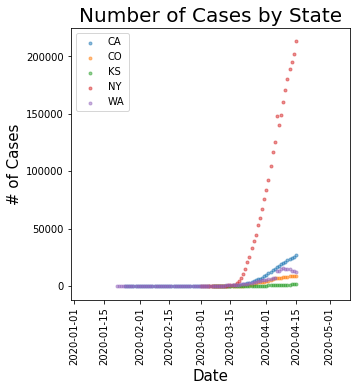

In [4]:
# Cases by State scatterplots
%matplotlib inline
fig, axs = plt.subplots(figsize=(5,5))

ca_date = covid_by_state[covid_by_state.state=='California'].date
co_date = covid_by_state[covid_by_state.state=='Colorado'].date
ks_date = covid_by_state[covid_by_state.state=='Kansas'].date
ny_date = covid_by_state[covid_by_state.state=='New York'].date
wa_date = covid_by_state[covid_by_state.state=='Washington'].date

ca_cases = covid_by_state[covid_by_state.state=='California'].cases
co_cases = covid_by_state[covid_by_state.state=='Colorado'].cases
ks_cases = covid_by_state[covid_by_state.state=='Kansas'].cases
ny_cases = covid_by_state[covid_by_state.state=='New York'].cases
wa_cases = covid_by_state[covid_by_state.state=='Washington'].cases

#scatter of each of the 5 states
axs.scatter(ca_date,ca_cases, alpha = 0.5, marker='.')
axs.scatter(co_date,co_cases, alpha = 0.5, marker='.')
axs.scatter(ks_date,ks_cases, alpha = 0.5, marker='.')
axs.scatter(ny_date,ny_cases, alpha = 0.5, marker='.')
axs.scatter(wa_date,wa_cases, alpha = 0.5, marker='.')

#Labeling
axs.set_title("Number of Cases by State", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
#axs.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)

plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

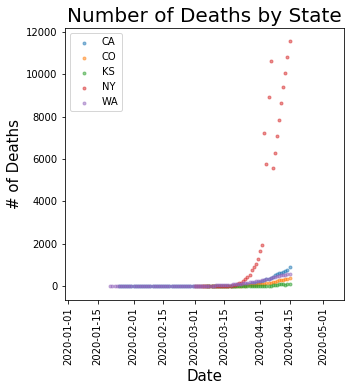

In [5]:
# Deaths by State scatterplots
%matplotlib inline

fig, axs = plt.subplots(figsize=(5,5))

ca_deaths = covid_by_state[covid_by_state.state=='California'].deaths
co_deaths = covid_by_state[covid_by_state.state=='Colorado'].deaths
ks_deaths = covid_by_state[covid_by_state.state=='Kansas'].deaths
ny_deaths = covid_by_state[covid_by_state.state=='New York'].deaths
wa_deaths = covid_by_state[covid_by_state.state=='Washington'].deaths

#scatter of each of the 5 states
axs.scatter(ca_date,ca_deaths, alpha = 0.5, marker='.')
axs.scatter(co_date,co_deaths, alpha = 0.5, marker='.')
axs.scatter(ks_date,ks_deaths, alpha = 0.5, marker='.')
axs.scatter(ny_date,ny_deaths, alpha = 0.5, marker='.')
axs.scatter(wa_date,wa_deaths, alpha = 0.5, marker='.')

#Labeling
axs.set_title("Number of Deaths by State", fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
#axs.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=90)

plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

# 2. Animation of cases/deaths over time on bar plot

In [8]:
#Re-use existing covid dataframe
covid.head()
#covid.date

,county_state,date,state,county,fips,county_fips,state_fips,cases,deaths
0,"Abbeville, South Carolina",2020-03-19,South Carolina,Abbeville,45001,001,[45],1,0
1,"Abbeville, South Carolina",2020-03-20,South Carolina,Abbeville,45001,001,[45],1,0
2,"Abbeville, South Carolina",2020-03-21,South Carolina,Abbeville,45001,001,[45],1,0
3,"Abbeville, South Carolina",2020-03-22,South Carolina,Abbeville,45001,001,[45],1,0
4,"Abbeville, South Carolina",2020-03-23,South Carolina,Abbeville,45001,001,[45],1,0


In [9]:
"""  Remove quotes to run, takes a while to load.
#Convert original COVID data to another dataframe format (easier to plot for animation)
#Sums all of the cases on all dates in all states 

#Create a dictionary of {key=states : value=list of cases over time}
states = list(covid.state.unique())
cases={}
for state in states:
    cases_list=[]
    for each in covid.date.unique():
        total = 0
        filtered = covid[(covid.date==each)&(covid['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += covid[(covid.date==each)&(covid['state']==state)]['cases'].iloc[i]
        cases_list.append(total)
    cases[state]=cases_list

#Convert dictionary above to a dataframe
#Dataframe to have columns of states showing number of cases by date
states = list(covid.state.unique())
data = {'date':list(covid.date.unique())}
for state in states:
    data[state] = cases[state]
cases_by_state = pd.DataFrame(data)

#Sorting dataframe by date
cases_by_state = cases_by_state.sort_values(by='date')
cases_by_state = cases_by_state.reset_index()
cases_by_state = cases_by_state.drop(['index'], axis=1)
cases_by_state.head()

#Convert dataframe to pickle, store for future use
cases_by_state.to_pickle('Data_pkl\cases_by_state.pkl')
"""

In [10]:
"""  Remove quotes to run, takes a while to load.
#Repeat above for deaths reported instead of just cases
#Convert original COVID data to another dataframe format (easier to plot for animation)
#Sums all of the cases on all dates in all states (took John 7+ minutes to load)

#Create a dictionary of {key=states : value=list of cases over time}
states = list(covid.state.unique())
deaths={}
for state in states:
    deaths_list=[]
    for each in covid.date.unique():
        total = 0
        filtered = covid[(covid.date==each)&(covid['state']==state)]['deaths']
        for i in range(0,len(filtered)):
            total += covid[(covid.date==each)&(covid['state']==state)]['deaths'].iloc[i]
        deaths_list.append(total)
    deaths[state]=deaths_list

#Convert dictionary above to a dataframe
#Dataframe to have columns of states showing number of cases by date
states = list(covid.state.unique())
data = {'date':list(covid.date.unique())}
for state in states:
    data[state] = deaths[state]
deaths_by_state = pd.DataFrame(data)

#Sorting dataframe by date
deaths_by_state = deaths_by_state.sort_values(by='date')
deaths_by_state = deaths_by_state.reset_index()
deaths_by_state = deaths_by_state.drop(['index'], axis=1)
deaths_by_state.head()

#Convert dataframe to pickle, store for future use
deaths_by_state.to_pickle('Data_pkl\deaths_by_state.pkl')
"""

In [34]:
#Read pickles created before, use for animation plot
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
#df2.head()

,date,South Carolina,Louisiana,Virginia,Idaho,Iowa,Kentucky,Missouri,Oklahoma,Colorado,...,Rhode Island,Nevada,District of Columbia,Connecticut,Hawaii,Delaware,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands
0,2020-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Prep cases/deaths dataframe for animation plot
df1.index = df1.date              #set date as index
df1 = df1.drop(['date'], axis=1)  #drop extra date column that is not the index
#df1.head()

df2.index = df2.date              #set date as index
df2 = df2.drop(['date'], axis=1)  #drop extra date column that is not the index
#df2.head()

#Transpose data to plot rows separately
df1t = df1.T
df2t = df2.T
#dft1.head()
#dft2.head()

#Sort data by date
df1ts=df1t.sort_index()
df2ts=df2t.sort_index()
#df1ts.head()
#df2ts.head()

In [40]:
#Checking how the dataframes have been prepped
df1ts.head()
#df2ts.head()

date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
Alabama,0,0,0,0,0,0,0,0,0,0,...,2006,2197,2499,2838,3008,3262,3583,3805,3953,4241
Alaska,0,0,0,0,0,0,0,0,0,0,...,189,211,238,233,244,255,270,275,283,291
Arizona,0,0,0,0,0,1,1,1,1,1,...,2501,2612,2726,3018,3161,3449,3595,3772,3876,3962
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1095,1165,1273,1356,1433,1487,1581,1888,1932,2075
California,0,0,0,0,1,2,2,2,2,2,...,16361,17539,19043,20191,21366,22421,23323,24334,25758,27107


In [41]:
df1ts.shape
#df2ts.shape

(55, 86)

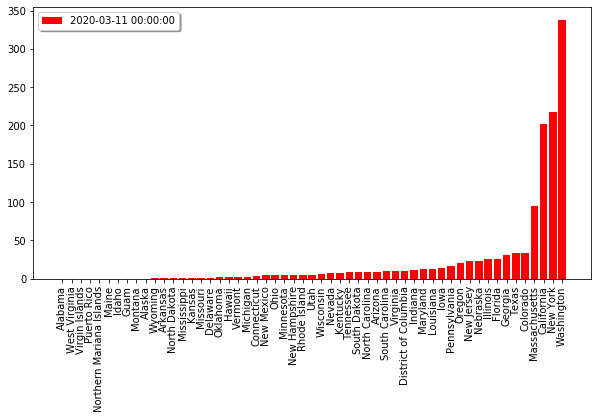

In [52]:
#Test plot for ONE date

#use inline for static plots as opposed to dynamic plots
%matplotlib inline    
frameno = 50          #row 50 will be called, selected randomly
column=df1ts.iloc[:,frameno].name         #gets the name of the column which is the date
df1tss=df1ts.sort_values(by=[column])     #sorts from least to most cases

#Plotting
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(df1tss.index, df1tss.iloc[:,frameno], color='red')   #bar graph
plt.xticks(rotation=90)
axs.legend([column], loc = 'upper left', shadow=True)        
plt.show()

<IPython.core.display.Javascript object>


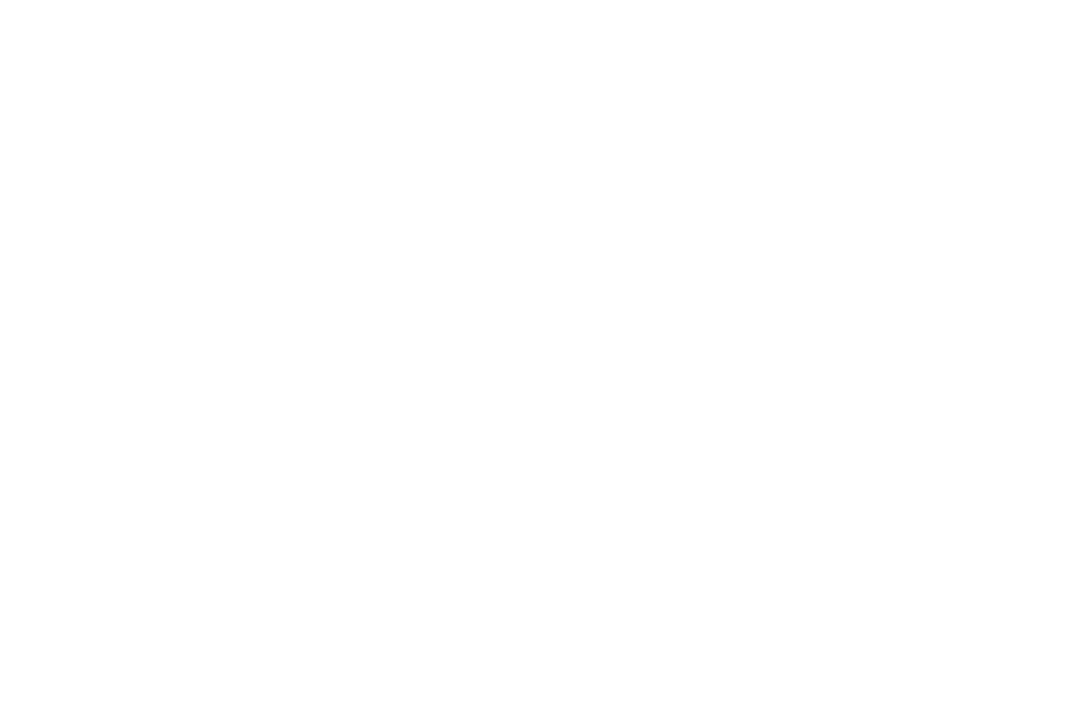

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [72]:
#Animation Plot of cases over time

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#use notebook for dynamic plots as opposed to static plots
%matplotlib notebook

#Initial plot set-up
fig, axs = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90, fontsize=10)
axs.set_title("Cases Over Time", fontsize=16)
axs.set_ylabel('# of Cases', fontsize=10)
axs.set_xlabel('State', fontsize=10)

#Did not use init function but can be used to set initial background of plot per frame
def init():
    return

#Create function for EACH frame, input to FuncAnimation method
def animate(frameno):
    column=str(df1ts.iloc[:,frameno].name).split()[0]
    #df1tss=df1ts.sort_index()
    axs.legend([column], loc = 'upper left', shadow=False)
    return axs.bar(df1ts.index, df1ts.iloc[:,frameno], color='red')

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=86, interval=200, blit=False)

anim.save('CaseOverTime.gif', writer='ffmpeg')    #saves the animation to a .gif file

plt.show()    #looks better when you save the animation

Traceback (most recent call last):
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


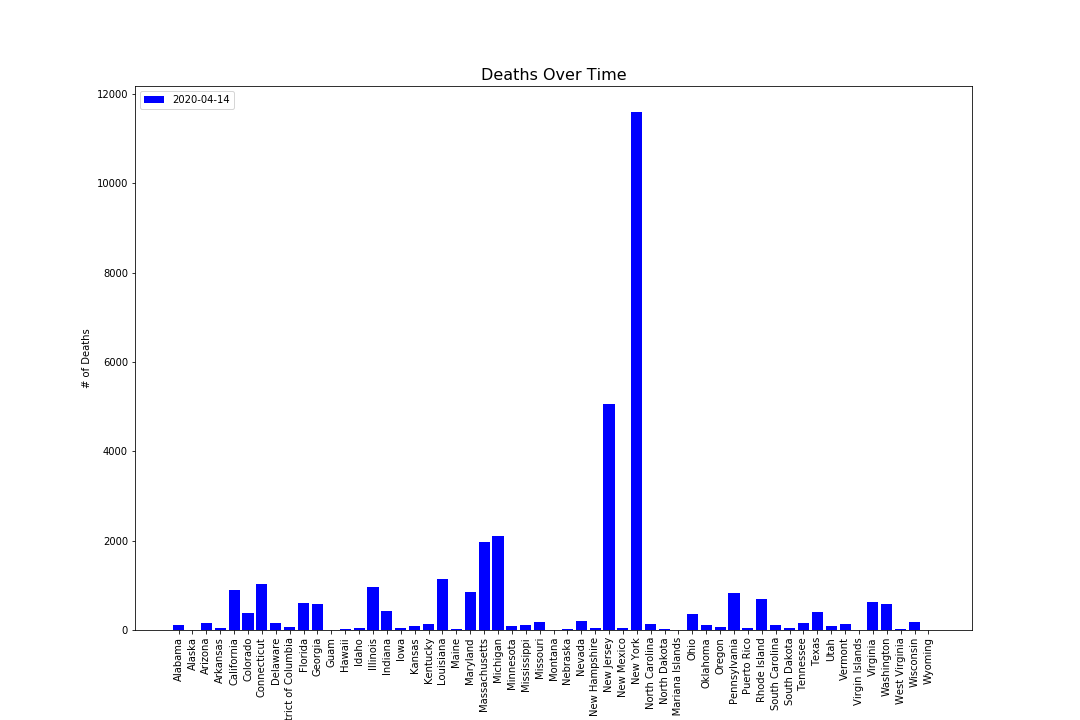

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [73]:
#Animation Plot of deaths over time

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#use notebook for dynamic plots as opposed to static plots
%matplotlib notebook

#Initial plot set-up
fig, axs = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90, fontsize=10)
axs.set_title("Deaths Over Time", fontsize=16)
axs.set_ylabel('# of Deaths', fontsize=10)
axs.set_xlabel('State', fontsize=10)

#Did not use init function but can be used to set initial background of plot per frame
def init():
    return

#Create function for EACH frame, input to FuncAnimation method
def animate(frameno):
    column=str(df2ts.iloc[:,frameno].name).split()[0]
    #df2tss=df2ts.sort_index()
    axs.legend([column], loc = 'upper left', shadow=False)
    return axs.bar(df2ts.index, df2ts.iloc[:,frameno], color='blue')

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=86, interval=86, blit=False)

anim.save('DeathOverTime.gif', writer='ffmpeg')    #saves the animation to a .gif file

plt.show()    #looks better when you save the animation

# 3. Cases/deaths on US Map for different dates


In [3]:
#Read pickles created before, use for animation plot
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
#df2.head()

,date,South Carolina,Louisiana,Virginia,Idaho,Iowa,Kentucky,Missouri,Oklahoma,Colorado,...,Rhode Island,Nevada,District of Columbia,Connecticut,Hawaii,Delaware,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands
0,2020-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Prep cases/deaths dataframe for animation plot
df1.index = df1.date              #set date as index
df1 = df1.drop(['date'], axis=1)  #drop extra date column that is not the index
#df1.head()

df2.index = df2.date              #set date as index
df2 = df2.drop(['date'], axis=1)  #drop extra date column that is not the index
#df2.head()

#Transpose data to plot rows separately
df1t = df1.T
df2t = df2.T
#dft1.head()
#dft2.head()

#Sort data by date
df1ts=df1t.sort_index()
df2ts=df2t.sort_index()
#df1ts.head()
#df2ts.head()

In [5]:
df1ts.head()

date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
Alabama,0,0,0,0,0,0,0,0,0,0,...,2006,2197,2499,2838,3008,3262,3583,3805,3953,4241
Alaska,0,0,0,0,0,0,0,0,0,0,...,189,211,238,233,244,255,270,275,283,291
Arizona,0,0,0,0,0,1,1,1,1,1,...,2501,2612,2726,3018,3161,3449,3595,3772,3876,3962
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1095,1165,1273,1356,1433,1487,1581,1888,1932,2075
California,0,0,0,0,1,2,2,2,2,2,...,16361,17539,19043,20191,21366,22421,23323,24334,25758,27107


In [6]:
#import modules for map
import geopandas as gpd
import shapefile as shp

# read in .shp file for US map
usa_map = gpd.read_file('.\states_21basic\states.shp')
usa_map = usa_map.sort_values(by="STATE_NAME")
usa_map

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
42,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
36,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
31,Colorado,32,08,Mountain,CO,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
18,Connecticut,19,09,New England,CT,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
28,Delaware,29,10,South Atlantic,DE,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
27,District of Columbia,28,11,South Atlantic,DC,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
48,Florida,49,12,South Atlantic,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


In [7]:
# merge map and Covid dataframes
#covid_map = pd.merge(df1ts,usa_map, how='left', left_on=df1ts.index, right_on=['STATE_NAME'])
#covid_map = covid_map.dropna()

covid_map = pd.merge(usa_map,df1ts, how='left', left_on=['STATE_NAME'], right_on=df1ts.index)
covid_map = covid_map.dropna()

# remove Alaska and Hawaii
covid_map = covid_map [covid_map.STATE_ABBR != 'HI']
covid_map = covid_map [covid_map.STATE_ABBR != 'AK']

covid_map

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,...,2020-04-06 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-10 00:00:00,2020-04-11 00:00:00,2020-04-12 00:00:00,2020-04-13 00:00:00,2020-04-14 00:00:00,2020-04-15 00:00:00
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,0,0,0,...,2006,2197,2499,2838,3008,3262,3583,3805,3953,4241
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",0,0,0,0,...,2501,2612,2726,3018,3161,3449,3595,3772,3876,3962
3,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",0,0,0,0,...,1095,1165,1273,1356,1433,1487,1581,1888,1932,2075
4,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",0,0,0,0,...,16361,17539,19043,20191,21366,22421,23323,24334,25758,27107
5,Colorado,32,08,Mountain,CO,"POLYGON ((-102.04446 37.64147, -102.04201 37.3...",0,0,0,0,...,7184,7256,7406,7917,7609,8202,8507,8811,8823,9169
6,Connecticut,19,09,New England,CT,"POLYGON ((-73.53039 41.52275, -73.51715 41.665...",0,0,0,0,...,9475,10602,12239,13543,14451,15899,16816,18183,19127,20026
7,Delaware,29,10,South Atlantic,DE,"POLYGON ((-75.70707 38.55759, -75.71071 38.649...",0,0,0,0,...,783,928,1116,1209,3741,4398,1625,5639,6476,6879
8,District of Columbia,28,11,South Atlantic,DC,"POLYGON ((-77.00793 38.96667, -76.91090 38.890...",0,0,0,0,...,1097,1211,1440,1523,1660,1778,1875,1955,2058,2197
9,Florida,49,12,South Atlantic,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",0,0,0,0,...,13670,14767,15718,16847,17988,19006,19883,21032,21655,22526
10,Georgia,45,13,South Atlantic,GA,"MULTIPOLYGON (((-85.13017 31.77885, -85.13156 ...",0,0,0,0,...,9728,12271,16336,17577,20483,21410,16443,17094,15978,15591


In [8]:
len(covid_map.columns)
covid_map.columns

column_names = []
misc = ['STATE_NAME','DRAWSEQ','STATE_FIPS',
        'SUB_REGION','STATE_ABBR','geometry']
for each in misc:
    column_names.append(each)
for each in covid_map.columns[6:]:
    each = str(each).split()[0]
    column_names.append(each)

#column_names
covid_map.columns = column_names
covid_map.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2020-01-21,2020-01-22,2020-01-23,2020-01-24,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,0,0,0,...,2006,2197,2499,2838,3008,3262,3583,3805,3953,4241
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",0,0,0,0,...,2501,2612,2726,3018,3161,3449,3595,3772,3876,3962
3,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",0,0,0,0,...,1095,1165,1273,1356,1433,1487,1581,1888,1932,2075
4,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",0,0,0,0,...,16361,17539,19043,20191,21366,22421,23323,24334,25758,27107
5,Colorado,32,08,Mountain,CO,"POLYGON ((-102.04446 37.64147, -102.04201 37.3...",0,0,0,0,...,7184,7256,7406,7917,7609,8202,8507,8811,8823,9169


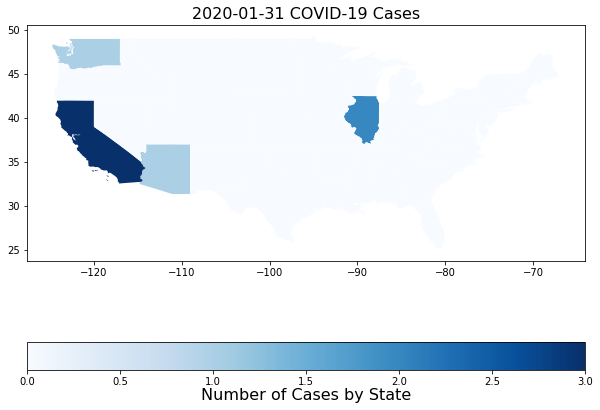

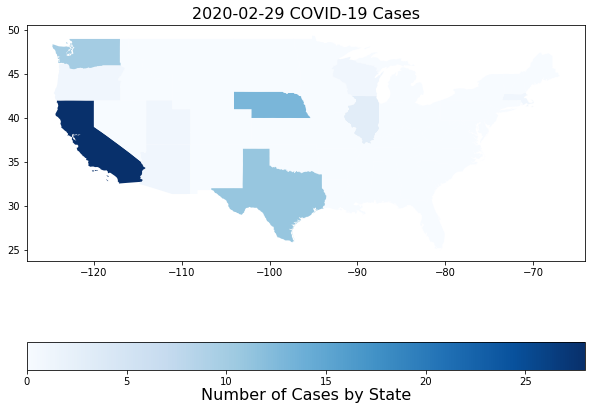

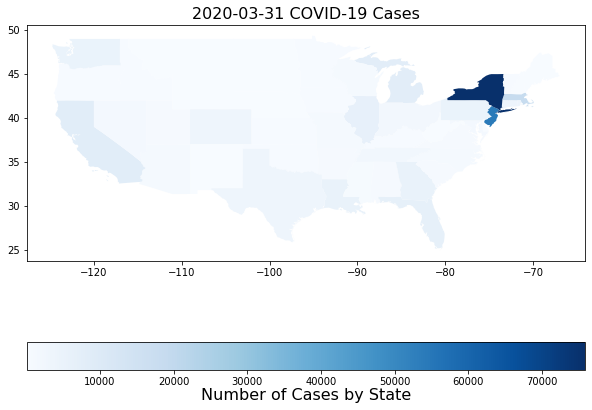

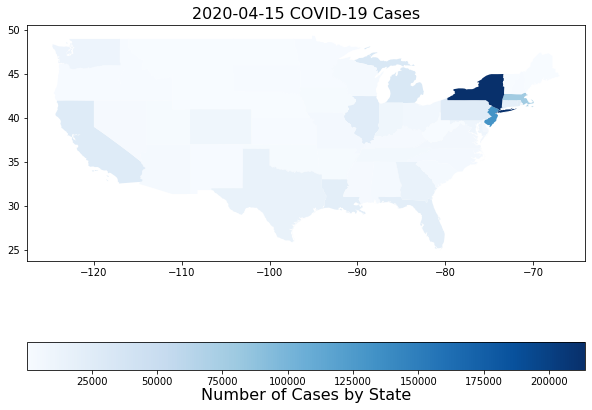

In [9]:
dates=['2020-01-31', '2020-02-29','2020-03-31','2020-04-15']

# create choropleth map for Covid-19 deaths
%matplotlib inline

for each in dates:
    fig,ax=plt.subplots(figsize=(10,10))
    ax = covid_map.plot(column=each,
                 cmap='Blues',
                 ax=ax,
                 legend=True,
                 legend_kwds={'orientation':'horizontal'})
    ax.set_title(each+' COVID-19 Cases', fontsize=16)
    ax.set_xlabel("Number of Cases by State",fontsize=16,  labelpad=110)
    
    
    
# fig,ax=plt.subplots(figsize=(5,5))
# ax = covid_map.plot(column=dates[3],
#              cmap='OrRd',
#              ax=ax,
#              legend=True,
#              legend_kwds={'orientation':'horizontal'})
# ax.set_title('COVID-19 Cases by State', fontsize=26)
# ax.set_xlabel("Number of Cases by State",fontsize=24,  labelpad=110)